In [1]:
# Importing libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
messages = pd.read_csv("SMSSpamCollection.txt",sep='\t',names=["label","message"])

In [3]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
ps = PorterStemmer()
lem = WordNetLemmatizer()

In [7]:
corpus_ps=[]
corpus_lem=[]

### Using Stemming and Evaluating the model

In [8]:
# Text Pre-Processing
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_ps.append(review)

In [9]:
corpus_ps[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [10]:
len(corpus_ps)

5572

In [11]:
y = pd.get_dummies(messages['label'])
print(y)
y = y.iloc[:,1].values
print(y)

      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]
[0 0 1 ... 0 0 0]


In [12]:
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
y=messages['label']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [14]:
def evaluate_model_stem_bow(model):
    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(corpus_ps,y,test_size=0.2, random_state=0)
    
    # Using Bag of words
    cv = CountVectorizer(max_features=2500)
    X_train = cv.fit_transform(X_train).toarray()
    X_test = cv.transform(X_test).toarray()
    
    # Using mentioned model
    spam_detect_model = model.fit(X_train,y_train)
    y_pred = spam_detect_model.predict(X_test)
    
    # Evaluating the model
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

[[953   2]
 [ 16 144]]
0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.99      0.90      0.94       160

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



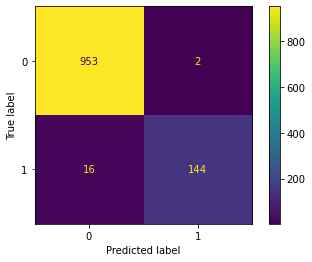

In [15]:
evaluate_model_stem_bow(BernoulliNB())

[[788 167]
 [ 14 146]]
0.8376681614349776
              precision    recall  f1-score   support

         ham       0.98      0.83      0.90       955
        spam       0.47      0.91      0.62       160

    accuracy                           0.84      1115
   macro avg       0.72      0.87      0.76      1115
weighted avg       0.91      0.84      0.86      1115



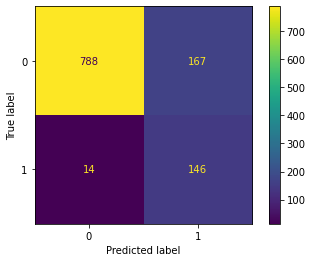

In [16]:
evaluate_model_stem_bow(GaussianNB())

[[950   5]
 [  8 152]]
0.9883408071748879
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       955
        spam       0.97      0.95      0.96       160

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



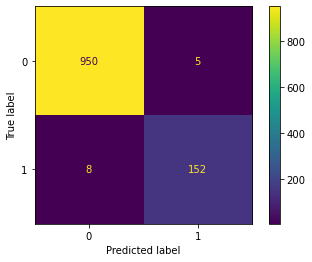

In [17]:
evaluate_model_stem_bow(MultinomialNB())

In [18]:
def evaluate_model_stem_tfidf(model):
    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(corpus_ps,y,test_size=0.2, random_state=0)
    
    # Using Bag of words
    cv = TfidfVectorizer(max_features=2500)
    X_train = cv.fit_transform(X_train).toarray()
    X_test = cv.transform(X_test).toarray()
    
    # Using mentioned model
    spam_detect_model = model.fit(X_train,y_train)
    y_pred = spam_detect_model.predict(X_test)
    
    # Evaluating the model
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

[[953   2]
 [ 16 144]]
0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.99      0.90      0.94       160

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



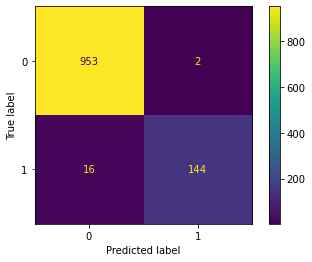

In [19]:
evaluate_model_stem_tfidf(BernoulliNB())

[[786 169]
 [ 17 143]]
0.8331838565022421
              precision    recall  f1-score   support

         ham       0.98      0.82      0.89       955
        spam       0.46      0.89      0.61       160

    accuracy                           0.83      1115
   macro avg       0.72      0.86      0.75      1115
weighted avg       0.90      0.83      0.85      1115



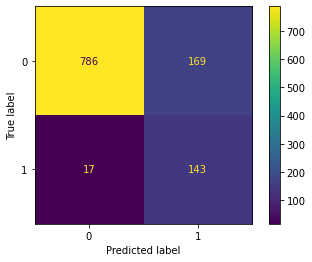

In [20]:
evaluate_model_stem_tfidf(GaussianNB())

[[955   0]
 [ 26 134]]
0.9766816143497757
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       955
        spam       1.00      0.84      0.91       160

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



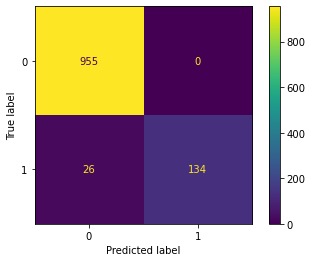

In [21]:
evaluate_model_stem_tfidf(MultinomialNB())

### Using Lemmatization and Evaluating the model

In [22]:
# Text Pre-Processing
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [lem.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_lem.append(review)

In [23]:
corpus_lem[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [24]:
def evaluate_model_lem_bow(model):
    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(corpus_lem,y,test_size=0.2, random_state=0)

    # Using Bag of words
    cv = CountVectorizer(max_features=2500)
    X_train = cv.fit_transform(X_train).toarray()
    X_test = cv.transform(X_test).toarray()


    # Using Multinomial Naive Bayes
    spam_detect_model = model.fit(X_train,y_train)
    y_pred = spam_detect_model.predict(X_test)

    # Evaluating the model
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

[[954   1]
 [ 16 144]]
0.9847533632286996
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.99      0.90      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



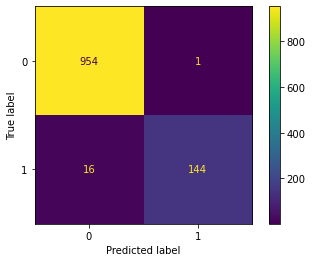

In [25]:
evaluate_model_lem_bow(BernoulliNB())

[[799 156]
 [ 12 148]]
0.8493273542600897
              precision    recall  f1-score   support

         ham       0.99      0.84      0.90       955
        spam       0.49      0.93      0.64       160

    accuracy                           0.85      1115
   macro avg       0.74      0.88      0.77      1115
weighted avg       0.91      0.85      0.87      1115



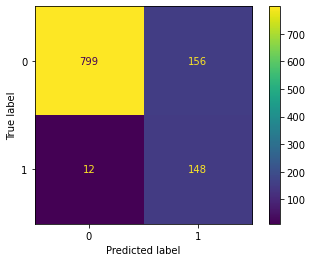

In [26]:
evaluate_model_lem_bow(GaussianNB())

[[948   7]
 [ 11 149]]
0.9838565022421525
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       955
        spam       0.96      0.93      0.94       160

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



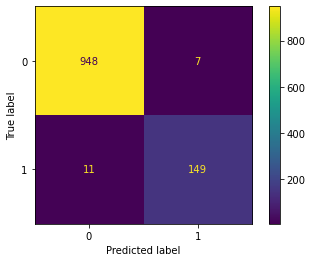

In [27]:
evaluate_model_lem_bow(MultinomialNB())

In [28]:
def evaluate_model_lem_tfidf(model):
    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(corpus_lem,y,test_size=0.2, random_state=0)

    # Using Bag of words
    cv = TfidfVectorizer(max_features=2500)
    X_train = cv.fit_transform(X_train).toarray()
    X_test = cv.transform(X_test).toarray()


    # Using Multinomial Naive Bayes
    spam_detect_model = model.fit(X_train,y_train)
    y_pred = spam_detect_model.predict(X_test)

    # Evaluating the model
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

[[954   1]
 [ 16 144]]
0.9847533632286996
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.99      0.90      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



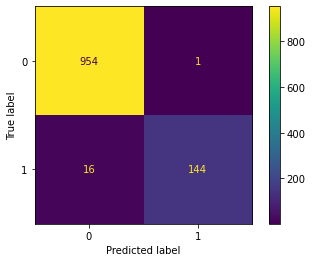

In [29]:
evaluate_model_lem_tfidf(BernoulliNB())

[[800 155]
 [ 17 143]]
0.8457399103139014
              precision    recall  f1-score   support

         ham       0.98      0.84      0.90       955
        spam       0.48      0.89      0.62       160

    accuracy                           0.85      1115
   macro avg       0.73      0.87      0.76      1115
weighted avg       0.91      0.85      0.86      1115



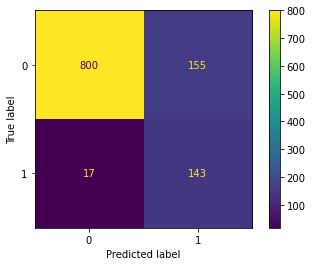

In [30]:
evaluate_model_lem_tfidf(GaussianNB())

[[954   1]
 [ 25 135]]
0.9766816143497757
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       955
        spam       0.99      0.84      0.91       160

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



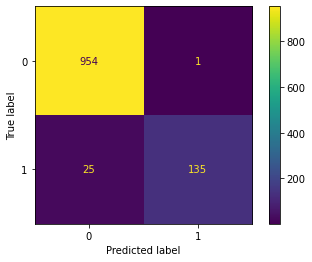

In [31]:
evaluate_model_lem_tfidf(MultinomialNB())

After text pre-processing and evaluating the model using bag of words and TF-IDF, we found that doing stemming and evaluating the model using TF-IDF, using algorithm Multinomial Naive Bayes, is yielding highest precision of 100%.